# Recurrent Nueral Network

- units = no of neurons
- Dropout is used to remove the neurons from the layer for regularization. Best practice is to remove 20% of the neurons

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training dataset

In [28]:
training_dataset = pd.read_csv('../datasets/google_stock_price_train.csv')
training_stock_price = training_dataset.iloc[:, 1:2].values
training_stock_price

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

### Importing the libraries

In [29]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
scaled_training_dataset = sc.fit_transform(training_stock_price)
scaled_training_dataset

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output
- Use first 60 records as input and 61st as output

In [30]:
X_train = []
y_train = []

for i in range(60, 1258):  # 1258 = total records
    X_train.append(scaled_training_dataset[i-60:i, 0])
    y_train.append(scaled_training_dataset[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # 3D Array

## Building and Training the RNN

### Importing keras libraries

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [33]:
regressor_rnn = Sequential() 

### Adding 1st LSTM Layer

Adding a Long Short-Term Memory (LSTM) layer to the RNN model. The LSTM layer is defined with the following arguments:

**units=50:** The number of LSTM cells or units in the layer. Increasing the number of units can improve the capacity of the model to learn complex patterns, but also increases the number of parameters to train.

**return_sequences=True:** Indicates whether the LSTM layer should return the full sequence of output values or only the last output value. In this case, return_sequences=True is set to pass the output of the LSTM layer to the next layer of the model.

**input_shape=(X_train.shape[1], 1):** The shape of the input data. X_train.shape[1] represents the number of time steps in the input sequence, and 1 represents the number of features at each time step. The input shape is required only for the first layer of the model, and the subsequent layers will infer the shape automatically.

**regressor_rnn.add(Dropout(0.2))**

This line adds a dropout layer to the RNN model. The dropout layer is used to prevent overfitting by randomly dropping out a fraction of the inputs to the layer during training. The dropout rate is defined as 0.2, which means that 20% of the inputs to the dropout layer will be randomly set to zero during training. The exact rate of dropout is a hyperparameter that can be tuned to improve the performance of the model.

In [34]:
regressor_rnn.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor_rnn.add(Dropout(0.2))

2023-05-04 19:16:24.817625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:16:24.818616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:16:24.819320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Adding 2nd LSTM Layer

In [35]:
regressor_rnn.add(LSTM(units=50, return_sequences=True))
regressor_rnn.add(Dropout(0.2))

2023-05-04 19:16:24.984227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:16:24.985367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:16:24.986140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Adding 3rd LSTM Layer

In [36]:
regressor_rnn.add(LSTM(units=50, return_sequences=True))
regressor_rnn.add(Dropout(0.2))

2023-05-04 19:16:25.149943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:16:25.150999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:16:25.151875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Adding 4th LSTM Layer

In [37]:
regressor_rnn.add(LSTM(units=50))
regressor_rnn.add(Dropout(0.2))

2023-05-04 19:16:25.315853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:16:25.317308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:16:25.318455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Adding the output layer

In [38]:
regressor_rnn.add(Dense(units=1))

### Compiling the RNN
**optimizer='adam':** The optimizer used to update the weights of the model during training. In this case, adam is an adaptive learning rate optimization algorithm that computes adaptive learning rates for each weight in the model. It has been shown to work well in many deep learning applications.

**loss='mean_square_error':** The loss function used to measure the difference between the predicted and actual output values during training. In this case, the mean squared error (MSE) is used, which is a common loss function for regression tasks. MSE measures the average squared difference between the predicted and actual values and penalizes large errors more than small ones.

In [39]:
regressor_rnn.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to training set
**epochs=100:** The number of times to iterate over the entire training dataset during training. One epoch is defined as one complete pass through the training data. In this case, the model will be trained for 100 epochs.

**batch_size=32:** The number of samples per gradient update. The training data is divided into batches, and the weights of the model are updated after each batch. A smaller batch size can result in a more accurate estimate of the gradient, but training can be slower. In this case, a batch size of 32 is used.

In [40]:
regressor_rnn.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


2023-05-04 19:16:25.613119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:16:25.614304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:16:25.615234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - 6s 42ms/step - loss: 0.0505
Epoch 2/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0071
Epoch 3/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0041
Epoch 13/100
38/38 [=================

## Making the predictions and visualizing the results

### Getting the real stock price of 2017

In [41]:
test_datatset = pd.read_csv('../datasets/google_stock_price_test.csv')
real_stock_price = test_datatset.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017
- getting input data to test using following ranges<br><br>
    0 - 60<br>
    1 - 61<br>
    2 - 62<br>
    ......

In [42]:
total_dataset = pd.concat((training_dataset['Open'], test_datatset['Open']), axis=0)
inputs = total_dataset[len(total_dataset) - len(test_datatset) - 60:].values
inputs = inputs.reshape(-1, 1)  # 2D array
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80): # 80 = total records in test data
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # 3D array
predicted_stock_price = regressor_rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


2023-05-04 19:19:13.828260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:19:13.829544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:19:13.830478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 778ms/step


### Visualizing the results

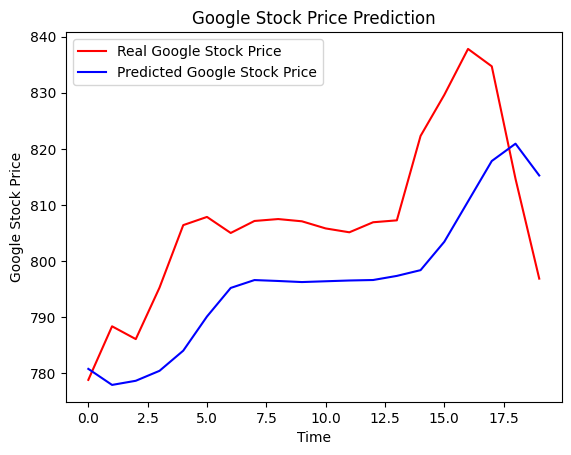

In [43]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()